In [104]:
#Estudo de caso 5 do curso de Introduação à Ciência de Dados Aplicada à Cibersegurança

#Importando bibliotecas básicas

import numpy as np # vetores e matrizes 
import pandas as pd # processamento dos dados, arquivo CSV I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')


In [105]:
# Importando a base de dados para o pandas

sms = pd.read_csv("data/spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [106]:
sms.label = sms.label.map({"ham":0, "spam":1})

In [107]:
# mais casos negativos (ham) que positivos (spams) 
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [108]:
#Dividindo a base em treino e teste
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(sms.message, 
                                                                            sms.label, 
                                                                            test_size=0.2)

In [109]:
# Criando o documento de treino

from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()
couvec.fit(features_train)

CountVectorizer()

In [110]:
# número de características ou tokens
trained_features = couvec.get_feature_names_out()
print("Número de características vetorizadas:", len(trained_features))
print("Exemplos de características treinadas:", trained_features[1:10])

Número de características vetorizadas: 7774
Exemplos de características treinadas: ['000' '008704050406' '0089' '0121' '01223585236' '01223585334'
 '0125698789' '02' '0207']


In [111]:
# tokenized train documents

dtm_train = couvec.fit_transform(features_train)
print("Shape of dtm_train:", dtm_train.shape)
print(dtm_train[0:2]) # first two rows of sparse matrix

Shape of dtm_train: (4457, 7774)
  (0, 5259)	1
  (0, 6758)	1
  (0, 4426)	1
  (0, 4839)	1
  (0, 902)	1
  (0, 4904)	1
  (0, 4681)	1
  (0, 1647)	1
  (0, 3943)	1
  (0, 1041)	1
  (0, 3659)	1
  (0, 7724)	1
  (0, 5511)	1
  (1, 902)	1
  (1, 4932)	1
  (1, 1421)	1
  (1, 914)	1
  (1, 3668)	1
  (1, 6820)	1
  (1, 4954)	1
  (1, 1106)	1
  (1, 1541)	1


In [112]:
# tokenized test documents

dtm_test = couvec.transform(features_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1115, 7774)


In [113]:
# Construíndo e avaliando o modelo 

# Multimodal Naive Bayes 
# O classificador multimodal Naive Bays é útil para classificar características discretas. 
# (e.g., número de palavras para classificação de textos). 
# A distribuição multimodal requer geralmente contadores inteiros como features.

# Importando e instanciando o modelo Nayve Bayes Multimodal
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [114]:
# Treinando o modelo

nb.fit(dtm_train, labels_train)

MultinomialNB()

In [115]:
# Fazendo predições

labels_pred = nb.predict(dtm_test)

In [116]:
# Acurácia
from sklearn import metrics
metrics.accuracy_score(labels_test, labels_pred)

0.989237668161435

In [117]:
# Criando a matrix de confusão para precisão e recall (essas são duas outrss métricas de avaliação) 
metrics.confusion_matrix(labels_test, labels_pred)

array([[962,   5],
       [  7, 141]])

In [118]:
# Percentagem do total de spams detectados i.e.recall
print("Recall:", metrics.recall_score(labels_test, labels_pred))

# Percentagem das predições positivas (spams) corretas, i.e. precisão
print("Precisão:", metrics.precision_score(labels_test, labels_pred))

Recall: 0.9527027027027027
Precisão: 0.9657534246575342


In [119]:
print("Ordem das classes no predict_proba:", nb.classes_)
print("Exemplos de probabilidades de classes:", nb.predict_proba(dtm_test)[0])


Ordem das classes no predict_proba: [0 1]
Exemplos de probabilidades de classes: [1.00000000e+00 3.19294436e-18]


In [120]:
# Uma vez que somente ~15% dos rótulos são positivos (spam), a curva precisão-recall é mais informativa que
# a curva ROC

labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, labels_prob)

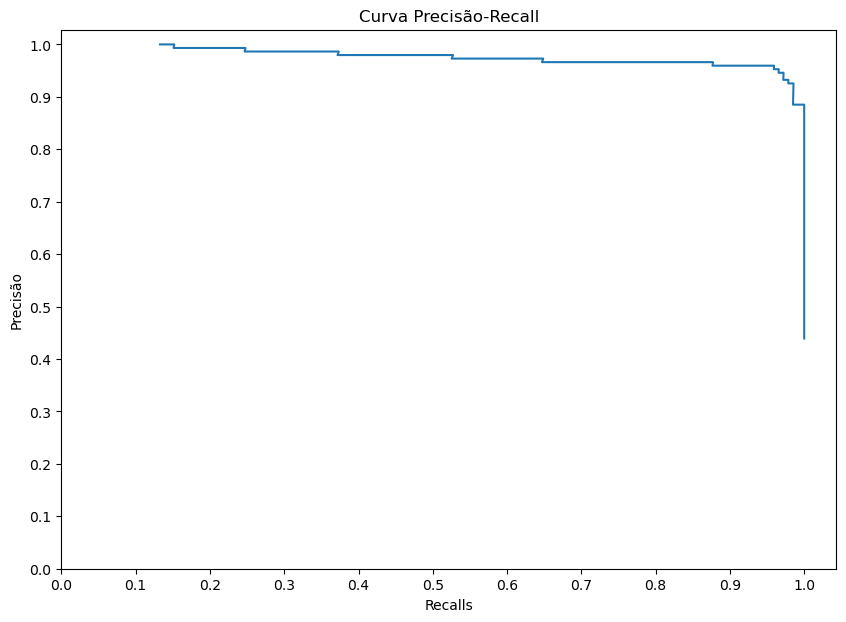

In [121]:
# Plotando a curva precisão-recall 

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall")
plt.show()

# Classificação utilizando TensorFlow

Para aprimorar ainda mais o modelo classificador de *spams*, a biblioteca *TensorFlow* será utilizada. Abaixo estão algumas referências ans quais me baseei para a construção desse classificador.

- https://www.tensorflow.org/?hl=pt-br
- https://medium.com/swlh/a-beginners-guide-to-text-classification-using-tensorflow-hub-59ba2e6d439c
- https://www.section.io/engineering-education/classification-model-using-bert-and-tensorflow/


# Desempenho
Para comparar o desempenho do modelo antigo e o novo  modelo proposta utilizando TensorFlow, serãor ealizadas comparações das métricas base de classificação como precisão, revocação, acurácia, *f1-score*, etc. Principa,mente, por se tratar de uma classificação binária, a métrica *f1-score* será a principal para comparação.

In [122]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [123]:
sms.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [124]:
# balanceamento do dataset
df_spam: pd.DataFrame = sms.query("label == 1")
df_ham: pd.DataFrame = sms.query("label == 0")
df_ham_downsampled: pd.DataFrame = df_ham.sample(df_spam.shape[0])
df_balanced: pd.DataFrame = pd.concat([df_ham_downsampled, df_spam])
df_balanced

,label,message
2627,0,I know I'm lacking on most of this particular ...
4495,0,"In case you wake up wondering where I am, I fo..."
396,0,Was actually sleeping and still might when u c...
5515,0,You are a great role model. You are giving so ...
5032,0,* Was really good to see you the other day dud...
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [125]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced["message"], df_balanced["label"], stratify=df_balanced["label"])

In [126]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

2023-05-28 20:35:34.147606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-05-28 20:35:34.147871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-05-28 20:35:34.147952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-05-28 20:35:34.148180: I tensorflow/core/

In [127]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

2023-05-28 20:35:39.386613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string and shape [?]
	 [[{{node inputs}}]]
2023-05-28 20:35:39.400364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]
2023-05-28 20:35:39.446672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs_1' with dtype int32 and shape [?,128]
	 [[{{node inputs_1}}]]
2023-05-

In [128]:
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

In [129]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_6 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [130]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
]

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=METRICS)

In [131]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-05-28 20:35:42.040463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_3' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_3}}]]
2023-05-28 20:35:42.040528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_4' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_4}}]]
2023

35/35 [==============================] - 126s 3s/step - loss: 0.6945 - accuracy: 0.5196 - precision: 0.5184 - recall: 0.5536
Epoch 2/10
35/35 [==============================] - 127s 4s/step - loss: 0.5407 - accuracy: 0.7759 - precision: 0.7706 - recall: 0.7857
Epoch 3/10
35/35 [==============================] - 131s 4s/step - loss: 0.4591 - accuracy: 0.8313 - precision: 0.8429 - recall: 0.8143
Epoch 4/10
35/35 [==============================] - 135s 4s/step - loss: 0.4112 - accuracy: 0.8643 - precision: 0.8505 - recall: 0.8839
Epoch 5/10
35/35 [==============================] - 135s 4s/step - loss: 0.3726 - accuracy: 0.8804 - precision: 0.8763 - recall: 0.8857
Epoch 6/10
35/35 [==============================] - 133s 4s/step - loss: 0.3544 - accuracy: 0.8875 - precision: 0.8820 - recall: 0.8946
Epoch 7/10
35/35 [==============================] - 136s 4s/step - loss: 0.3280 - accuracy: 0.8938 - precision: 0.8917 - recall: 0.8964
Epoch 8/10
35/35 [==============================] - 135s 4s

In [148]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 41s 3s/step


In [149]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [150]:
metrics.accuracy_score(y_test, y_predicted)

0.9278074866310161